<a href="https://colab.research.google.com/github/sparsh-ai/notebooks/blob/main/Data_Encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Encoding

In [5]:
!pip install -qq category-encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 3.0 MB/s eta 0:00:00


In [6]:
# data management
import numpy as np                   # for linear algebra
import pandas as pd                  # for tabular data manipulation and processing
import category_encoders             # for categorical encoding
from skimage import io               # for input/output processing

# machine learning
import sklearn                       # for data prep and classical ML
import tensorflow as tf              # for deep learning
from tensorflow import keras         # for deep learning

# data visualization and graphics
import matplotlib.pyplot as plt      # for visualization fundamentals
import seaborn as sns                # for pretty visualizations
sns.set_palette("magma")
import cv2                           # for image manipulation

# misc
from tqdm.notebook import tqdm       # for progress bars
import math                          # for calculation
import sys                           # for system manipulation
import os                            # for file manipulation

### Discrete Data

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/hjhuney/Data/master/AmesHousing/train.csv')
df = df.dropna(axis=1, how='any')
df = df[['MSSubClass', 'MSZoning', 'LotArea', 'Street',
         'LotShape', 'OverallCond', 'YearBuilt', 'YrSold',
         'SaleCondition', 'SalePrice']]
df = df.dropna()
df

,MSSubClass,MSZoning,LotArea,Street,LotShape,OverallCond,YearBuilt,YrSold,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,5,2003,2008,Normal,208500
1,20,RL,9600,Pave,Reg,8,1976,2007,Normal,181500
2,60,RL,11250,Pave,IR1,5,2001,2008,Normal,223500
3,70,RL,9550,Pave,IR1,5,1915,2006,Abnorml,140000
4,60,RL,14260,Pave,IR1,5,2000,2008,Normal,250000
...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Pave,Reg,5,1999,2007,Normal,175000
1456,20,RL,13175,Pave,Reg,6,1978,2010,Normal,210000
1457,70,RL,9042,Pave,Reg,9,1941,2010,Normal,266500
1458,20,RL,9717,Pave,Reg,6,1950,2010,Normal,142125


#### Label Encoding

In [ ]:
def label_encoding(arr):
    unique = np.unique(arr)
    mapping = {elem:index for index, elem in enumerate(unique)}
    return np.array([mapping[elem] for elem in arr])

lot_shape = np.array(df['LotShape'])
encoded = label_encoding(lot_shape)

print(f'Original Array: {lot_shape}')
print(f'Encoded Array:  {encoded}')

Original Array: ['Reg' 'Reg' 'IR1' ... 'Reg' 'Reg' 'Reg']
Encoded Array:  [3 3 0 ... 3 3 3]


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoded = encoder.fit_transform(df['LotShape'])

print(f'Original Array: {lot_shape}')
print(f'Encoded Array:  {encoded}')

Original Array: ['Reg' 'Reg' 'IR1' ... 'Reg' 'Reg' 'Reg']
Encoded Array:  [3 3 0 ... 3 3 3]


#### One-Hot Encoding

In [ ]:
def one_hot_encoding(arr):
    labels = label_encoding(arr)
    encoded = np.zeros((len(arr), len(np.unique(arr))))
    for i in range(len(arr)):
        encoded[i][labels[i]] = 1
    return encoded

lot_shape = np.array(df['LotShape'])
encoded = one_hot_encoding(lot_shape)

print(f'Original Array: {lot_shape}')
print(f'Encoded Array: \n{encoded}')

Original Array: ['Reg' 'Reg' 'IR1' ... 'Reg' 'Reg' 'Reg']
Encoded Array: 
[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


In [ ]:
pd.get_dummies(df['LotShape']) 

,IR1,IR2,IR3,Reg
0,0,0,0,1
1,0,0,0,1
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
1455,0,0,0,1
1456,0,0,0,1
1457,0,0,0,1
1458,0,0,0,1


#### Binary Encoding

In [ ]:
def binary_encoding(arr):
    labels = label_encoding(arr)
    max_place = int(np.floor(np.math.log(np.max(labels), 2)))
    encoded = np.zeros((len(arr), max_place+1))
    for i in range(len(arr)):
        curr_val = labels[i]
        for curr_place in range(max_place, -1, -1):
            encoded[i][curr_place] = curr_val // (2 ** curr_place)
            curr_val = curr_val % (2 ** curr_place)
    return encoded

In [ ]:
binary_encoding(['a','b','c','c','d','d','d','e'] )

array([[0., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 1., 0.],
       [0., 0., 1.]])

In [ ]:
from category_encoders.binary import BinaryEncoder
encoder = BinaryEncoder()
encoded = encoder.fit_transform(df['LotShape'])
encoded

,LotShape_0,LotShape_1,LotShape_2
0,0,0,1
1,0,0,1
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
1455,0,0,1
1456,0,0,1
1457,0,0,1
1458,0,0,1


#### Frequency Encoding

In [ ]:
def frequency_encoding(arr):
    labels, counts = np.unique(arr, return_counts=True)
    counts = counts / np.sum(counts)
    mapping_dic = {labels[i]:counts[i] for i in range(len(counts))}
    mapping = lambda label:mapping_dic[label]
    return np.vectorize(mapping)(arr)

In [ ]:
np.round(frequency_encoding(np.array(df['LotShape'])), 2)

array([0.63, 0.63, 0.33, ..., 0.63, 0.63, 0.63])

In [ ]:
from category_encoders.count import CountEncoder
encoder = CountEncoder()
encoder.fit_transform(df['LotShape'])

,LotShape
0,925
1,925
2,484
3,484
4,484
...,...
1455,925
1456,925
1457,925
1458,925


#### Target Encoding

In [ ]:
def target_encoding(x, y, mode='mean'):
    labels = np.unique(x)
    func = np.mean if mode=='mean' else np.median
    mapping_dic = {label:func(y[x==label]) for label in labels}
    mapping = lambda label:mapping_dic[label]
    return np.vectorize(mapping)(x)

In [ ]:
np.round(target_encoding(df['LotShape'], df['SalePrice']), 2)

array([164754.82, 164754.82, 206101.67, ..., 164754.82, 164754.82,
       164754.82])

In [ ]:
from category_encoders.target_encoder import TargetEncoder
encoder = TargetEncoder()
encoded = encoder.fit_transform(df['LotShape'], df['SalePrice'])
encoded

,LotShape
0,164754.818378
1,164754.818378
2,206101.665289
3,206101.665289
4,206101.665289
...,...
1455,164754.818378
1456,164754.818378
1457,164754.818378
1458,164754.818378


#### Leave One Out Encoding

In [ ]:
def leave_one_out_encoding(x, y, mode='mean'):
    labels = np.unique(x)
    func = np.mean if mode=='mean' else np.median
    encoded = []
    for i in range(len(x)):
        leftout = y[np.arange(len(y)) != i]
        encoded.append(np.mean(leftout[x == x[i]]))
    return np.array(encoded)

In [ ]:
leave_one_out_encoding(df['LotShape'], df['SalePrice'])

array([164707.47510823, 164736.69588745, 206065.64389234, ...,
       164644.70454545, 164779.30952381, 164773.49242424])

In [ ]:
from category_encoders.leave_one_out import LeaveOneOutEncoder
encoder = LeaveOneOutEncoder ()
encoded = encoder.fit_transform(df['LotShape'], df['SalePrice'])
encoded

,LotShape
0,164707.475108
1,164736.695887
2,206065.643892
3,206238.521739
4,206010.778468
...,...
1455,164743.730519
1456,164705.851732
1457,164644.704545
1458,164779.309524


#### James-Stein Encoding

In [ ]:
from category_encoders import JamesSteinEncoder
encoder = JamesSteinEncoder()
encoded = encoder.fit_transform(df['LotShape'], df['SalePrice'])
encoded

,LotShape
0,167097.685845
1,167097.685845
2,201579.625847
3,201579.625847
4,201579.625847
...,...
1455,167097.685845
1456,167097.685845
1457,167097.685845
1458,167097.685845


#### WOE Encoder

In [ ]:
from category_encoders.woe import WOEEncoder
encoder = WOEEncoder()
y = df['Street'].map({'Pave':0, 'Grvl':1})
encoded = encoder.fit_transform(df['LotShape'], y)
encoded

,LotShape
0,-0.013101
1,-0.013101
2,-0.284931
3,-0.284931
4,-0.284931
...,...
1455,-0.013101
1456,-0.013101
1457,-0.013101
1458,-0.013101


### Continuous Data

#### Normalization

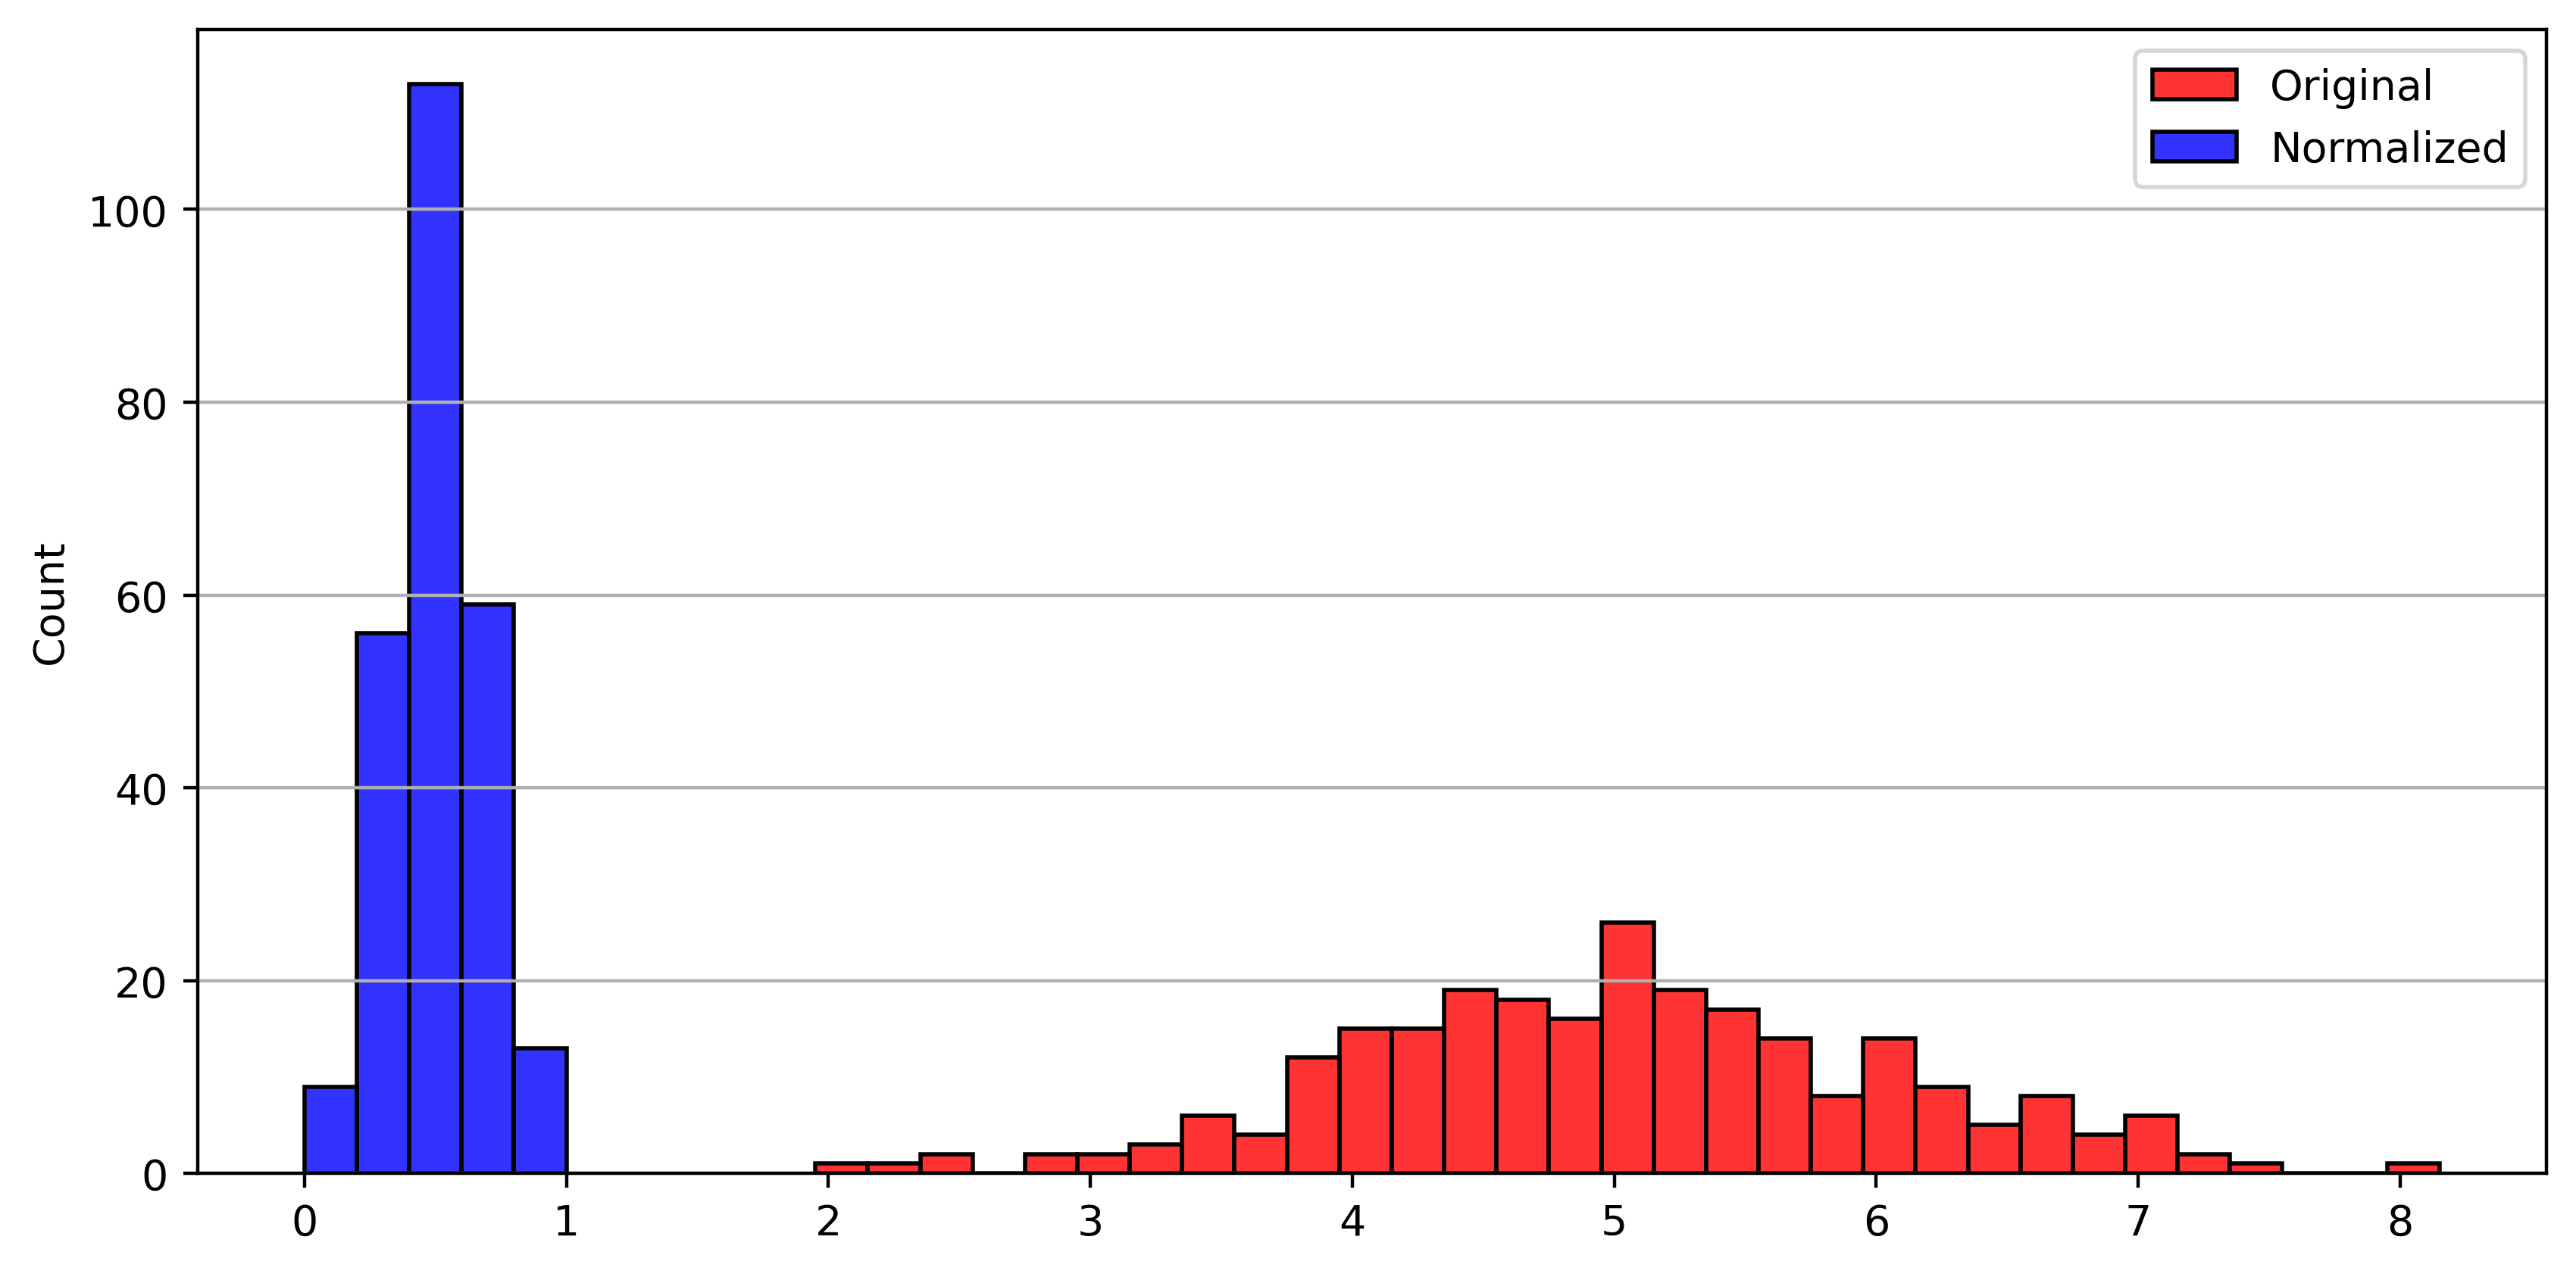

In [ ]:
arr = np.random.normal(loc=5, scale=1, size=(250,))
adjusted = (arr - arr.min()) / (arr.max() - arr.min())

plt.figure(figsize=(10, 5), dpi=400)
axes = plt.gca()
axes.yaxis.grid()
sns.histplot(arr, color='red', label='Original', alpha = 0.8, binwidth=0.2)
sns.histplot(adjusted, color='blue', label='Normalized', alpha = 0.8, binwidth=0.2)
plt.legend()
plt.show()

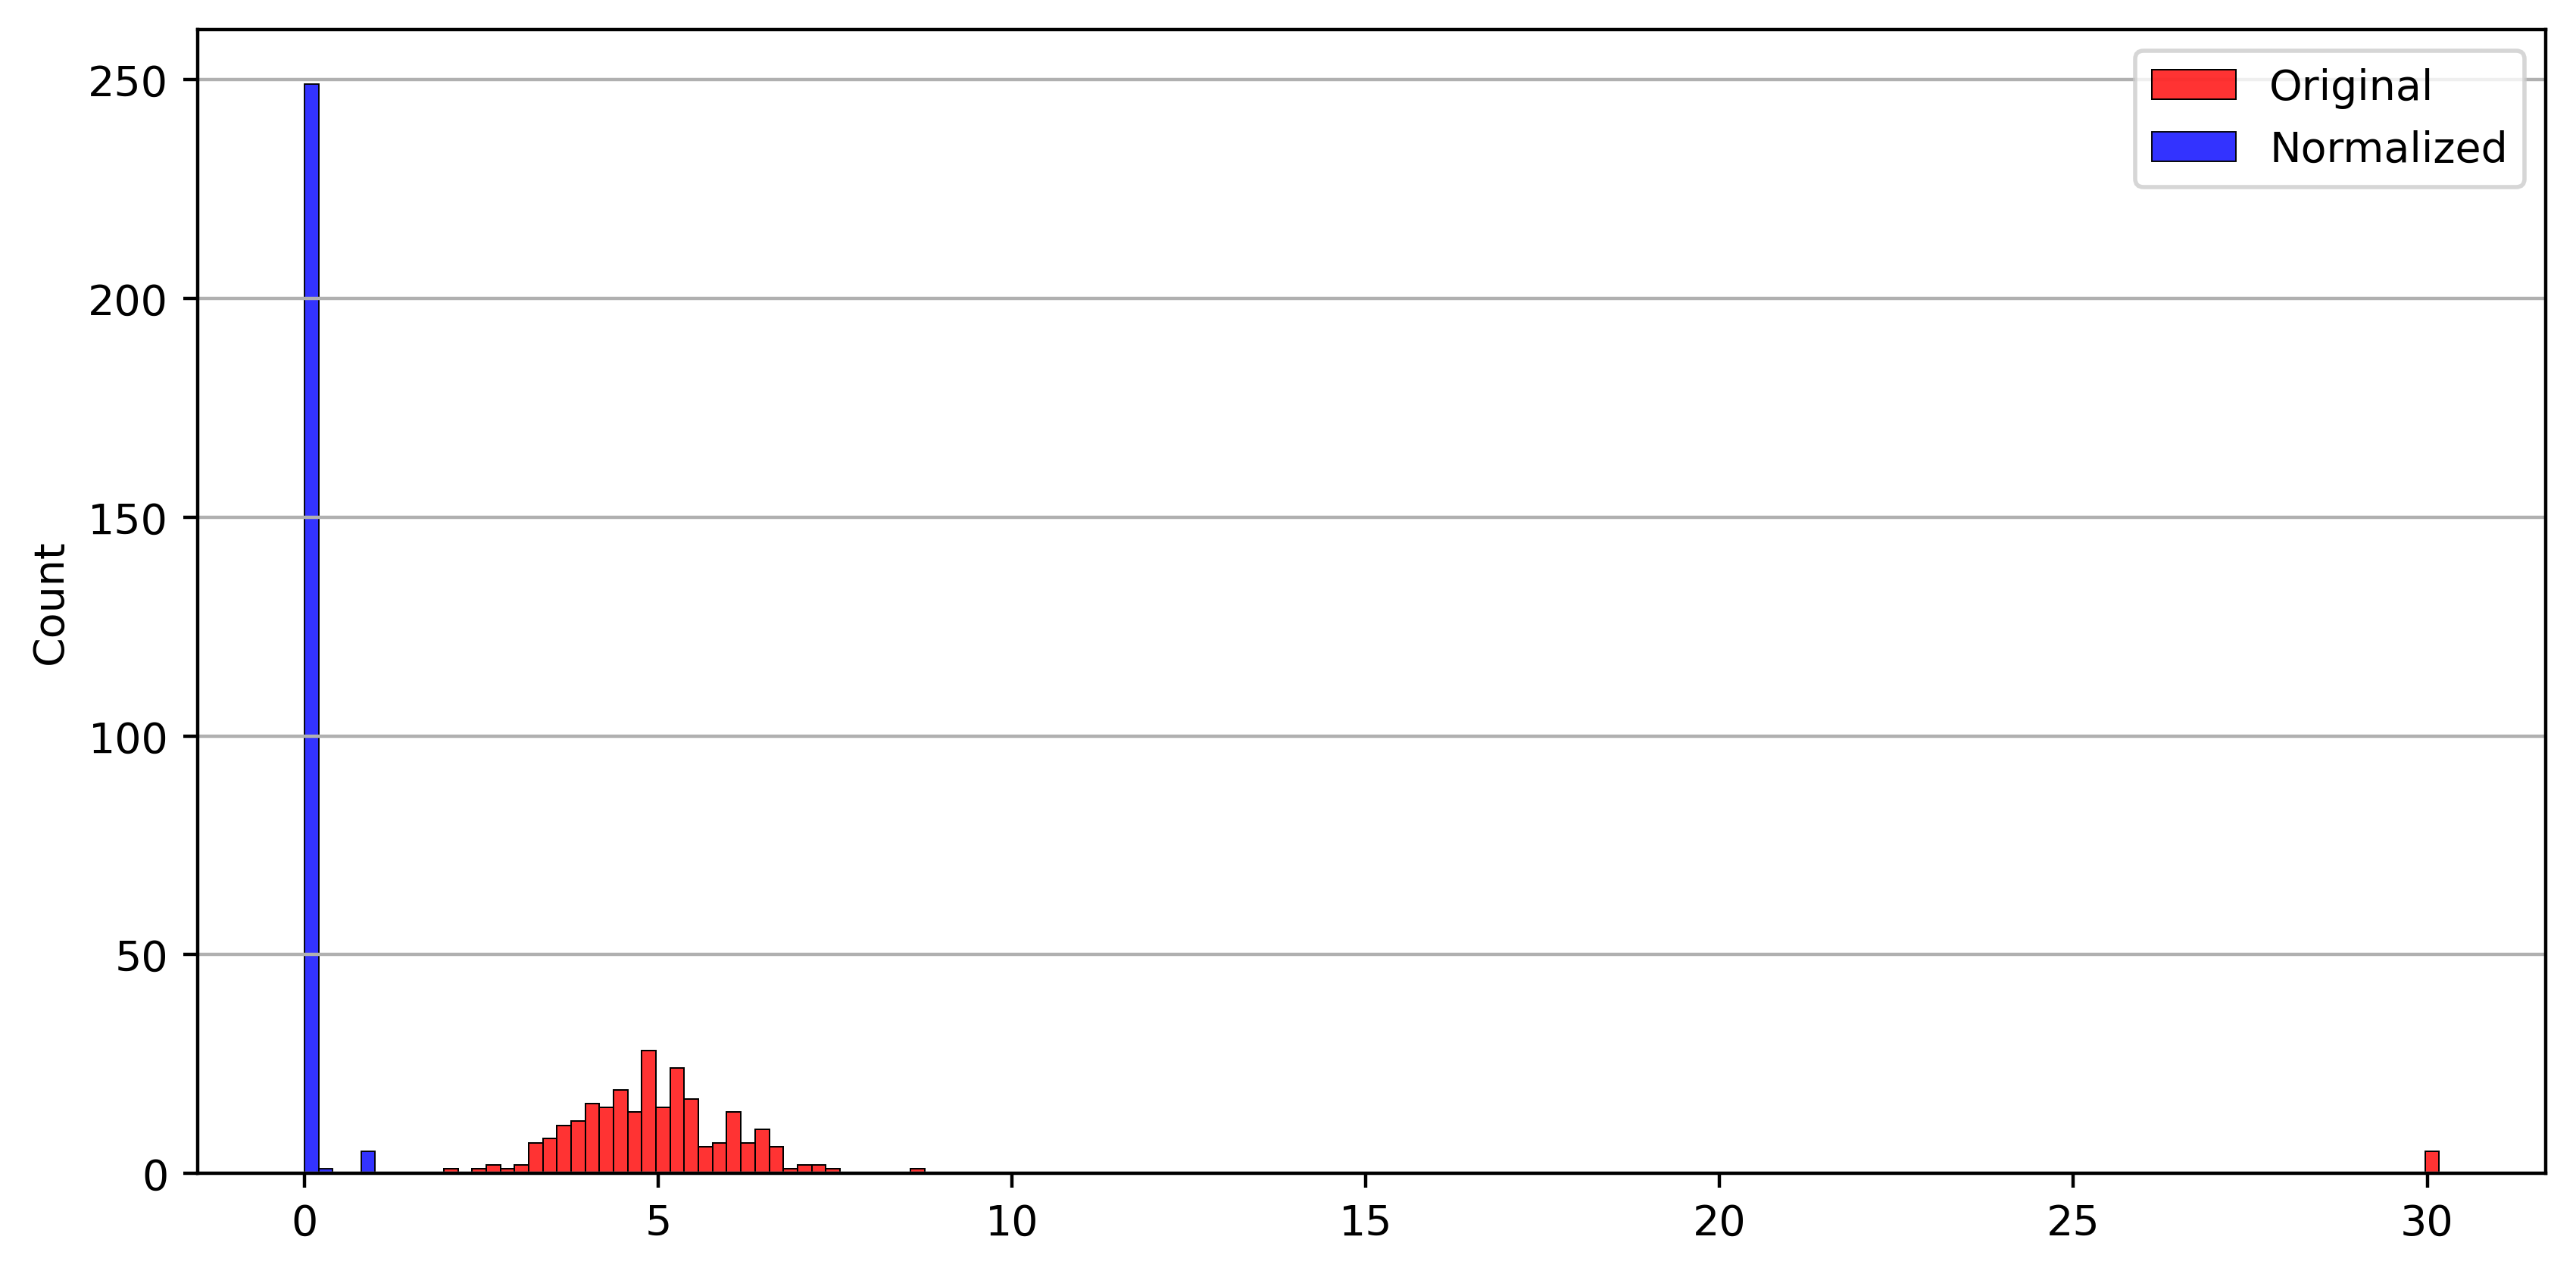

In [ ]:
arr = np.random.normal(loc=5, scale=1, size=(250,))
arr = np.append(arr, [30]*5)
adjusted = (arr - arr.min()) / (arr.max() - arr.min())

plt.figure(figsize=(10, 5), dpi=400)
axes = plt.gca()
axes.yaxis.grid()
sns.histplot(arr, color='red', label='Original', alpha = 0.8, binwidth=0.2)
sns.histplot(adjusted, color='blue', label='Normalized', alpha = 0.8, binwidth=0.2)
plt.legend()
plt.show()

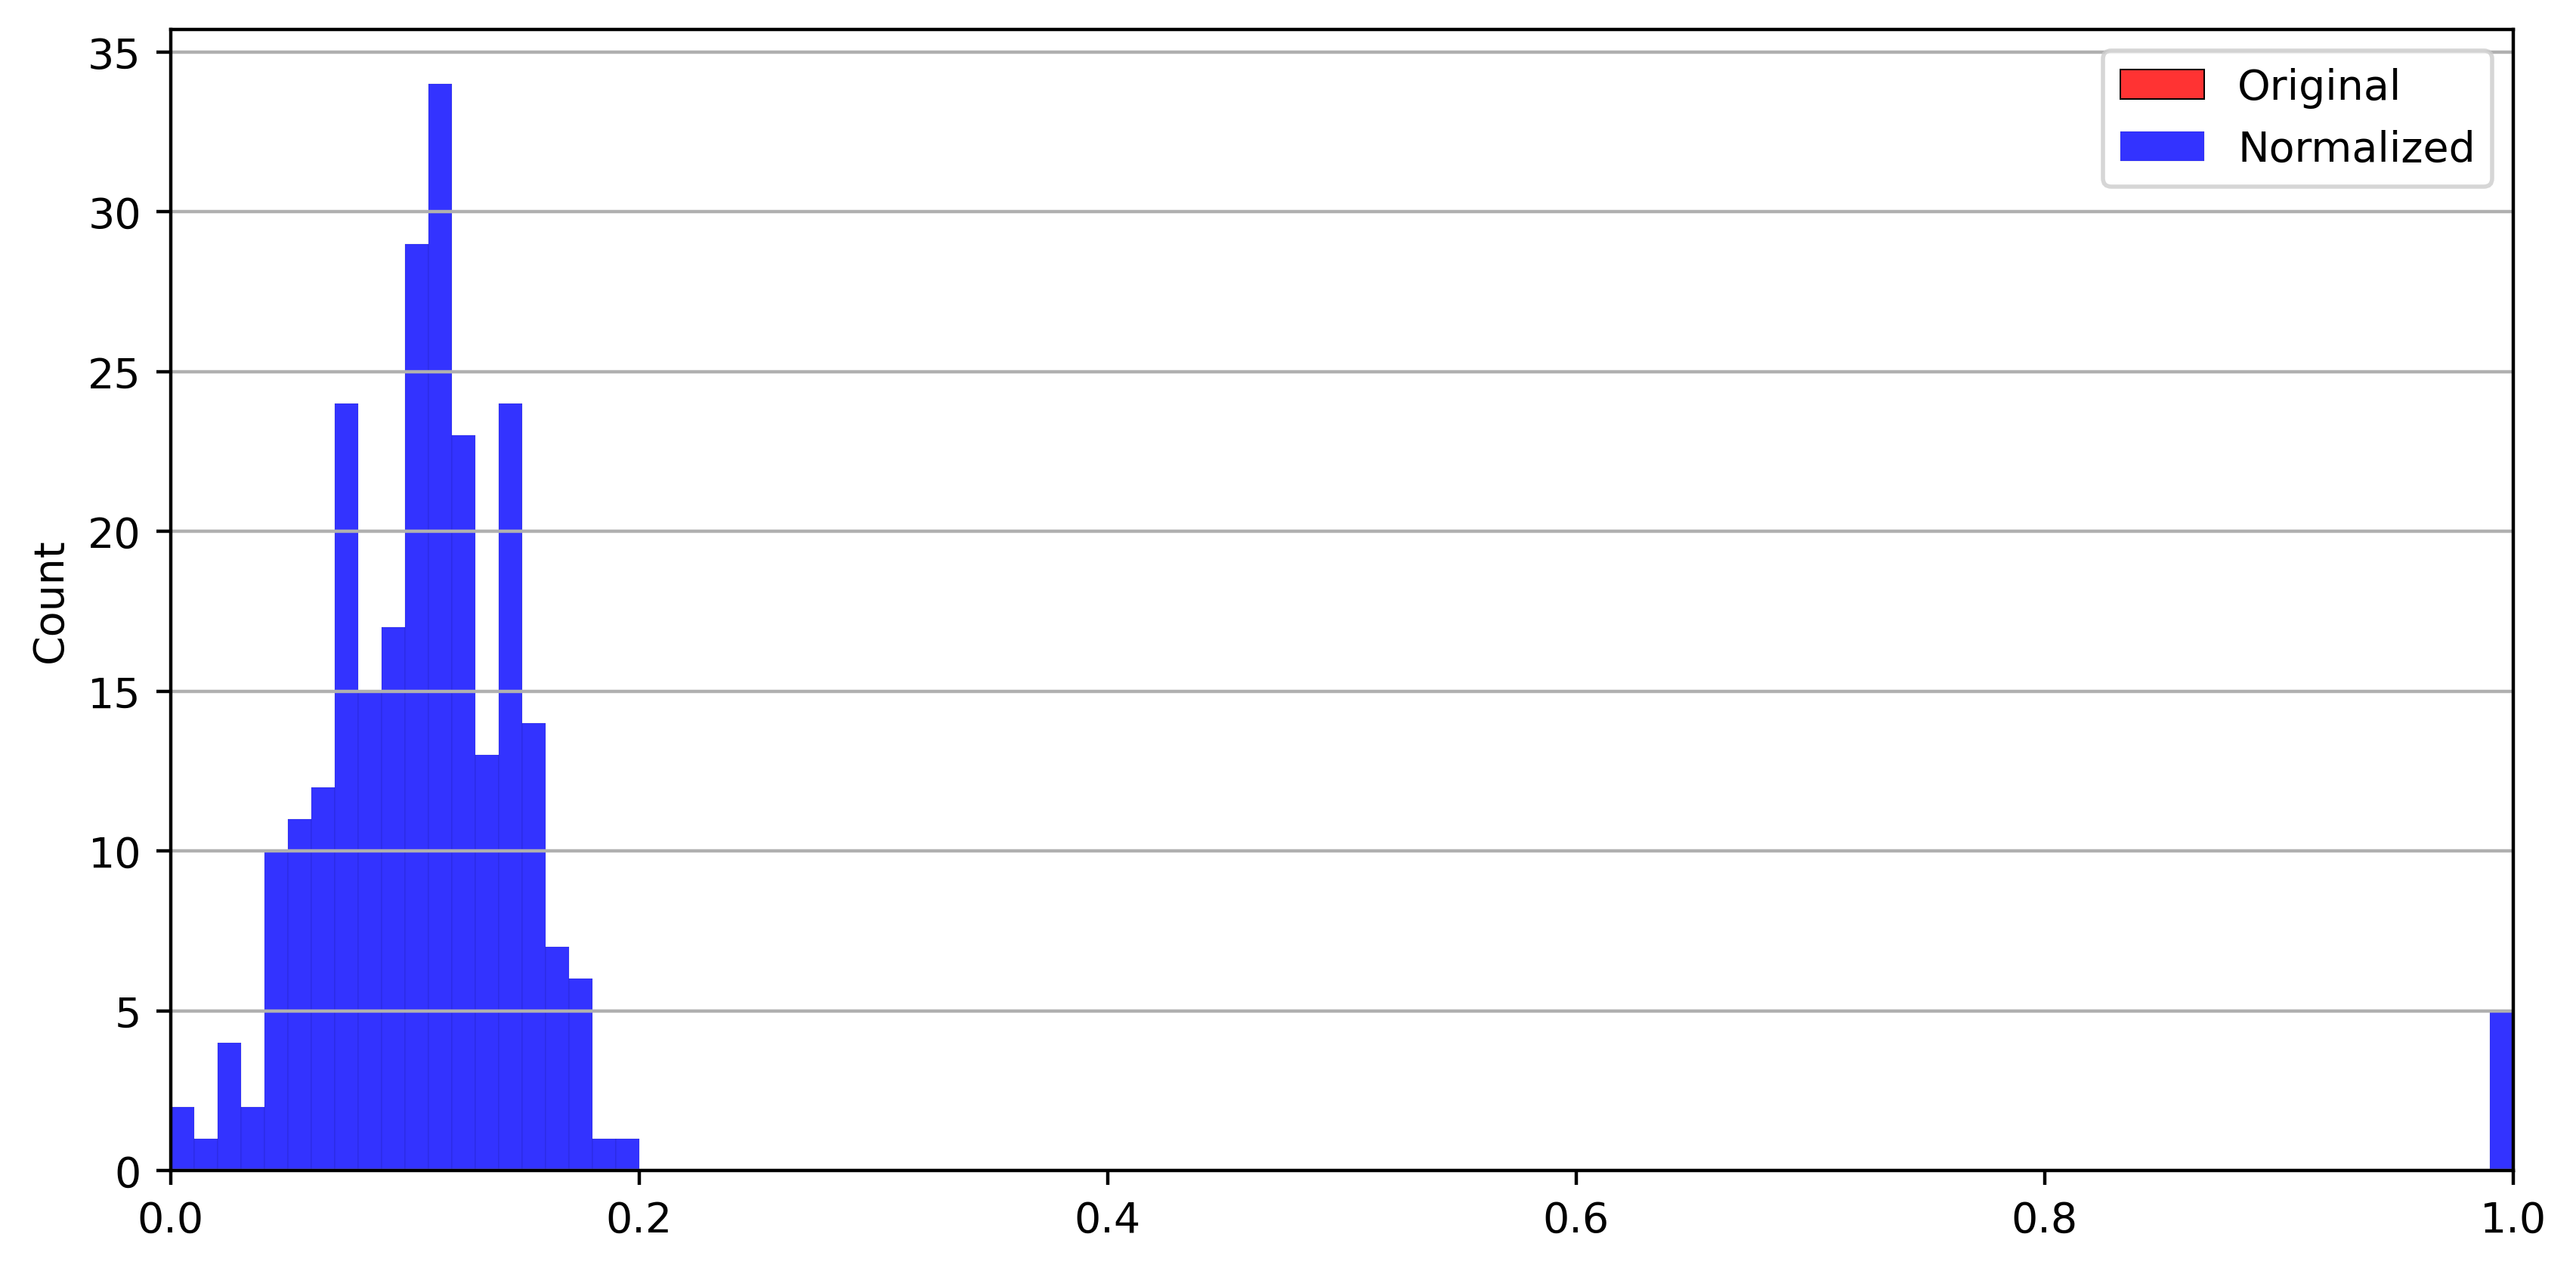

In [ ]:
arr = np.random.normal(loc=5, scale=1, size=(250,))
arr = np.append(arr, [30]*5)
adjusted = (arr - arr.min()) / (arr.max() - arr.min())

plt.figure(figsize=(10, 5), dpi=400)
axes = plt.gca()
axes.yaxis.grid()
sns.histplot(arr, color='red', label='Original', alpha = 0.8, binwidth=0.2)
sns.histplot(adjusted, color='blue', label='Normalized', alpha = 0.8, binwidth=0.01)
plt.legend()
plt.xlim([0, 1])
plt.show()

#### Robust Scaling

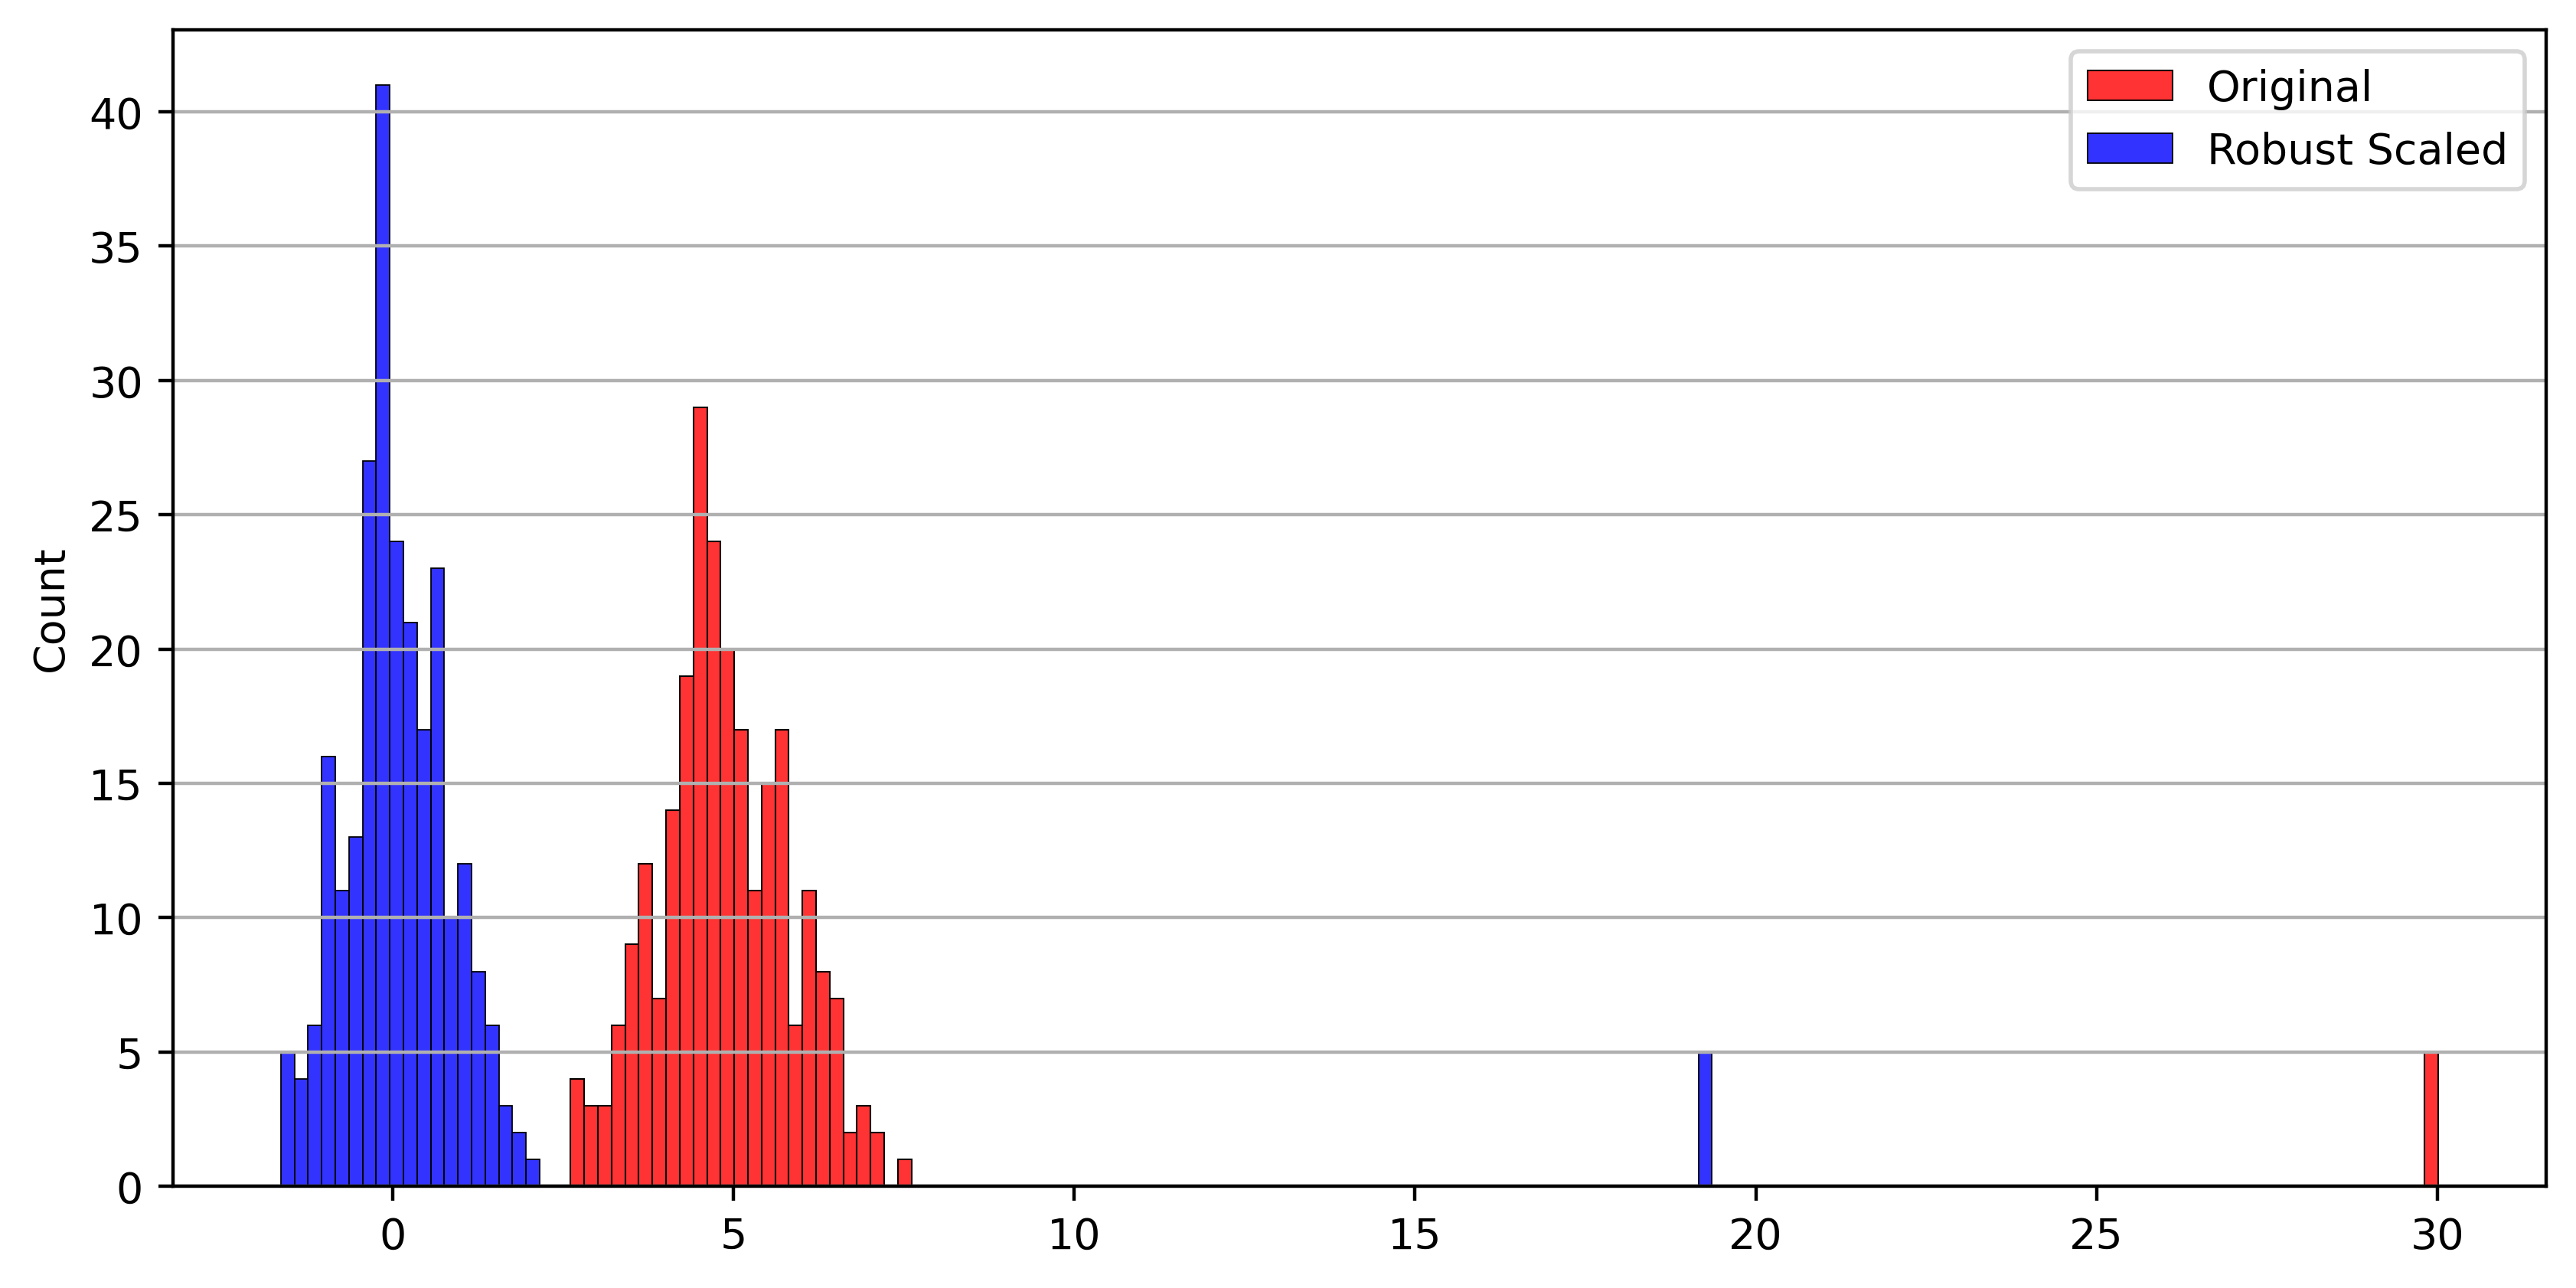

In [ ]:
plt.figure(figsize=(10, 5), dpi=400)
axes = plt.gca()
axes.yaxis.grid()

arr = np.random.normal(loc=5, scale=1, size=(250,))
adjusted = (arr - arr.min()) / (arr.max() - arr.min())

arr = np.append(arr, [30]*5)
rs_adjusted = (arr - np.median(arr)) / (np.quantile(arr, 0.75) - np.quantile(arr, 0.25))

sns.histplot(arr, color='red', label='Original', alpha = 0.8, binwidth=0.2)
sns.histplot(rs_adjusted, color='blue', label='Robust Scaled', alpha = 0.8, binwidth=0.2)
plt.legend()
plt.show()

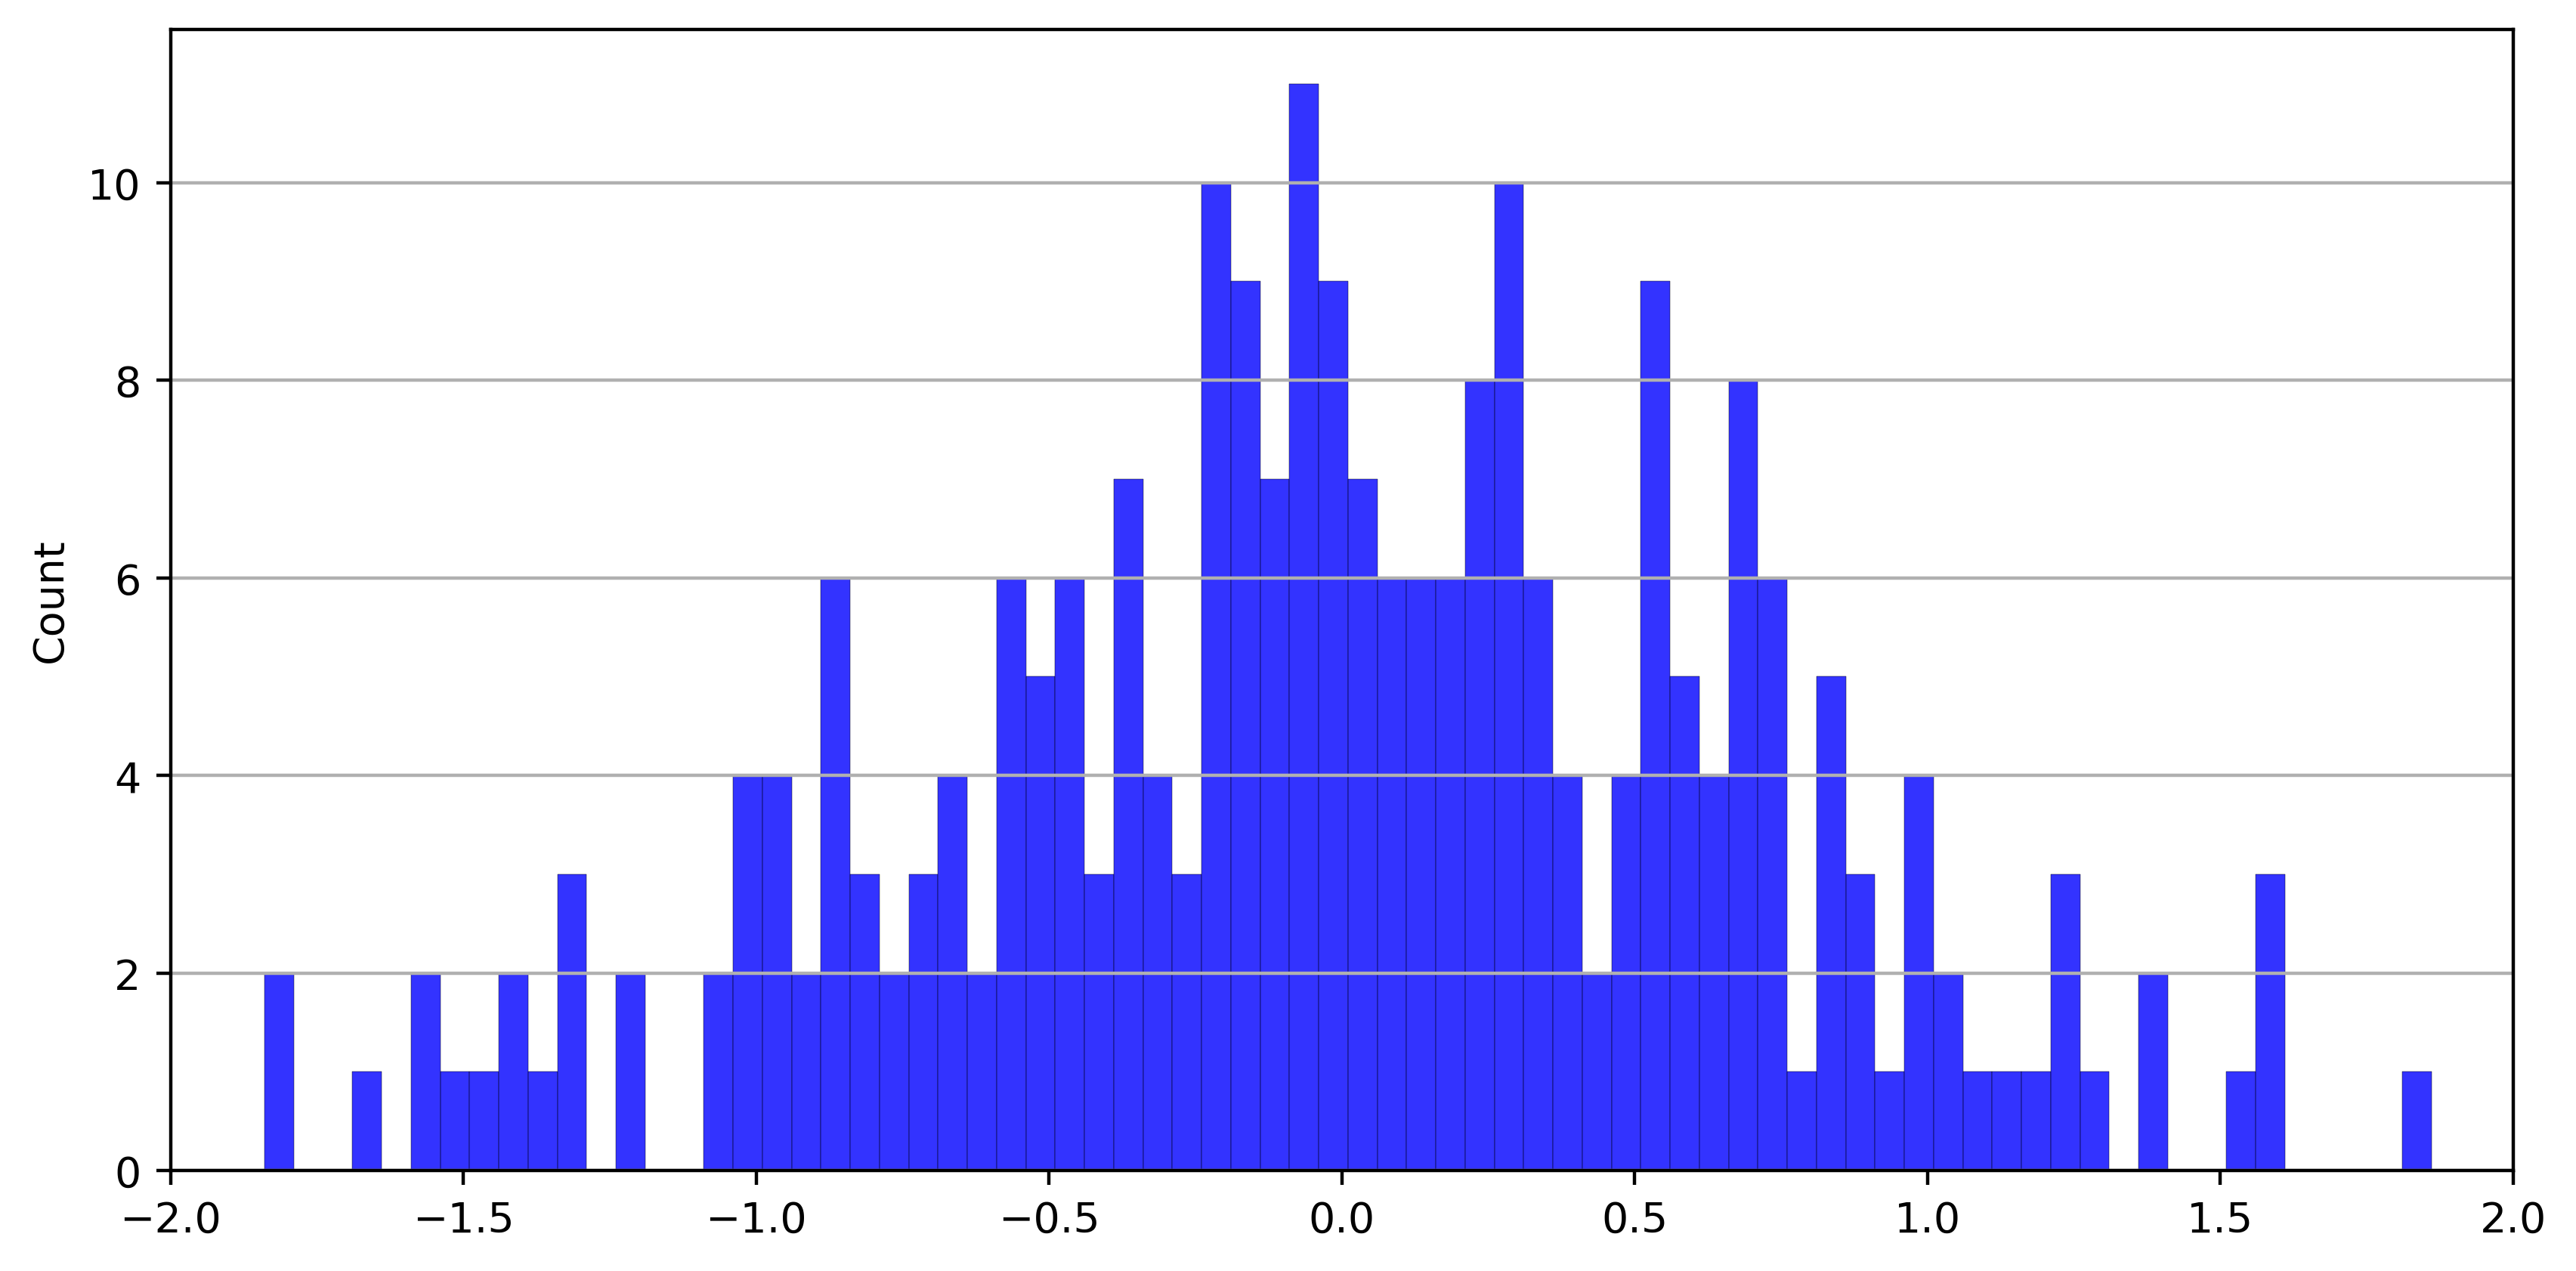

In [ ]:
plt.figure(figsize=(10, 5), dpi=400)
axes = plt.gca()
axes.yaxis.grid()

arr = np.random.normal(loc=5, scale=1, size=(250,))
adjusted = (arr - arr.min()) / (arr.max() - arr.min())

arr = np.append(arr, [30]*5)
rs_adjusted = (arr - np.median(arr)) / (np.quantile(arr, 0.75) - np.quantile(arr, 0.25))

sns.histplot(arr, color='red', label='Original', alpha = 0.8, binwidth=0.05)
sns.histplot(rs_adjusted, color='blue', label='Robust Scaled', alpha = 0.8, binwidth=0.05)
plt.xlim([-2., 2.])
plt.show()

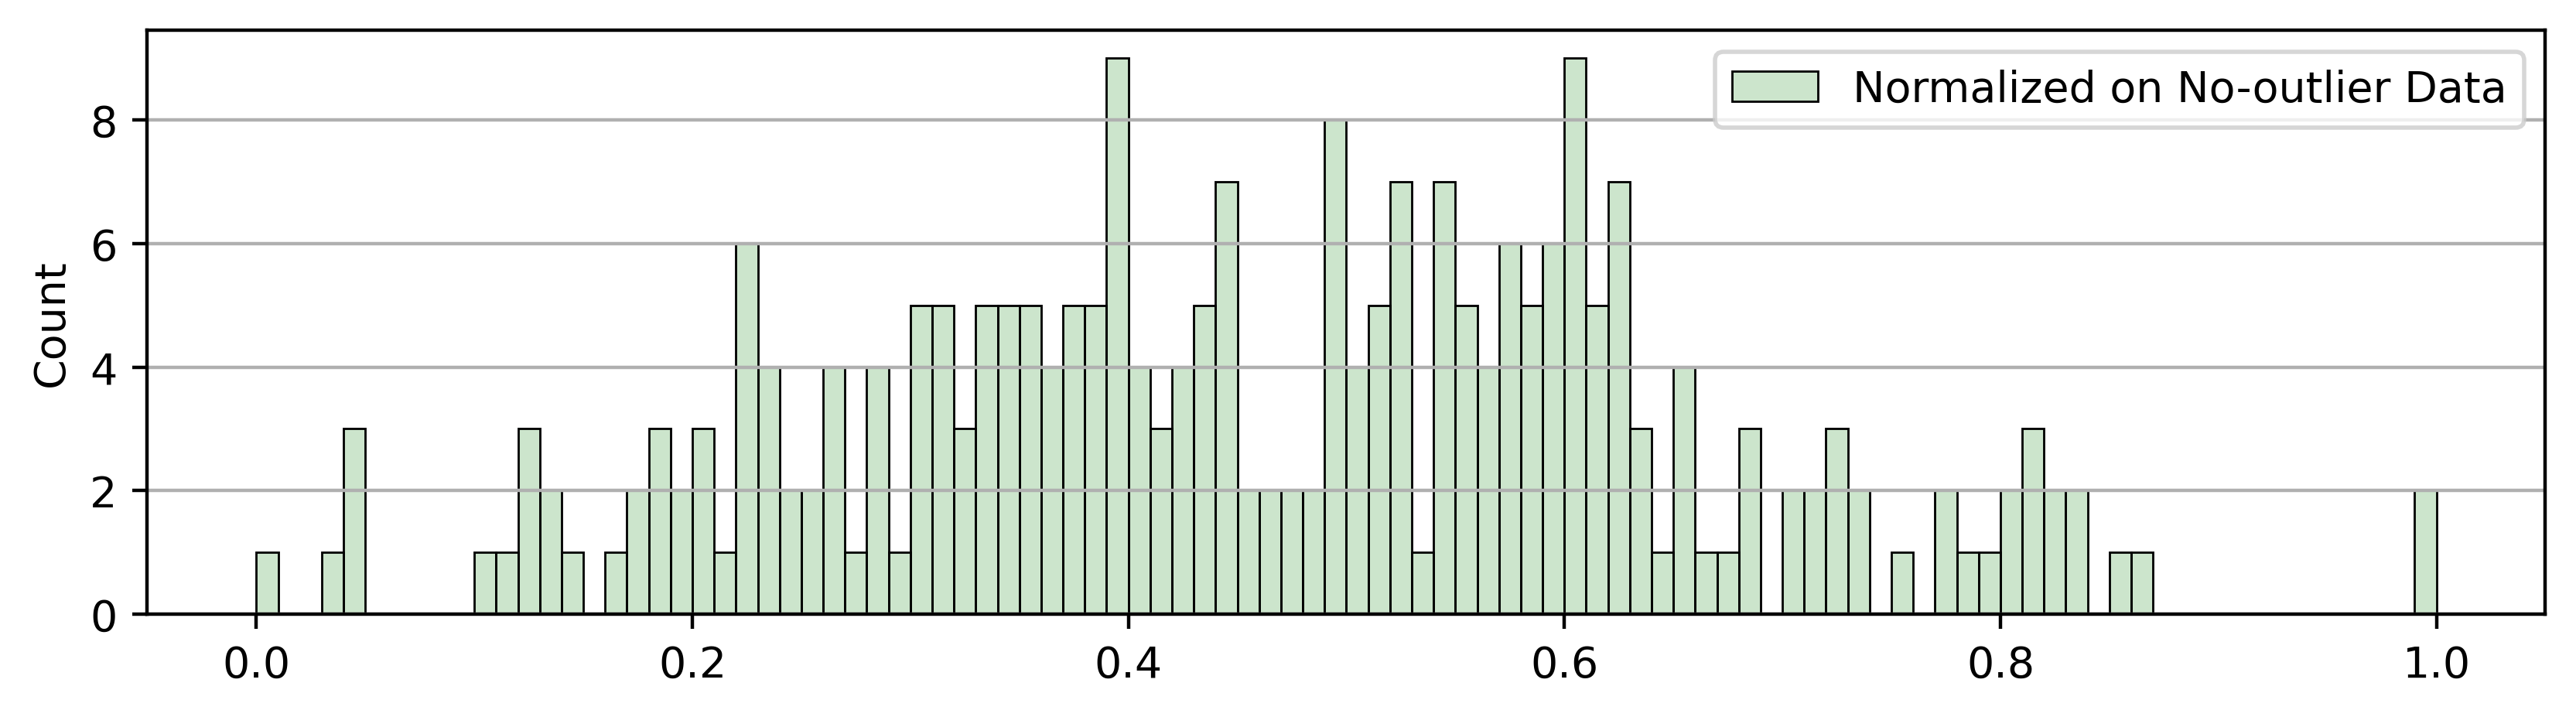

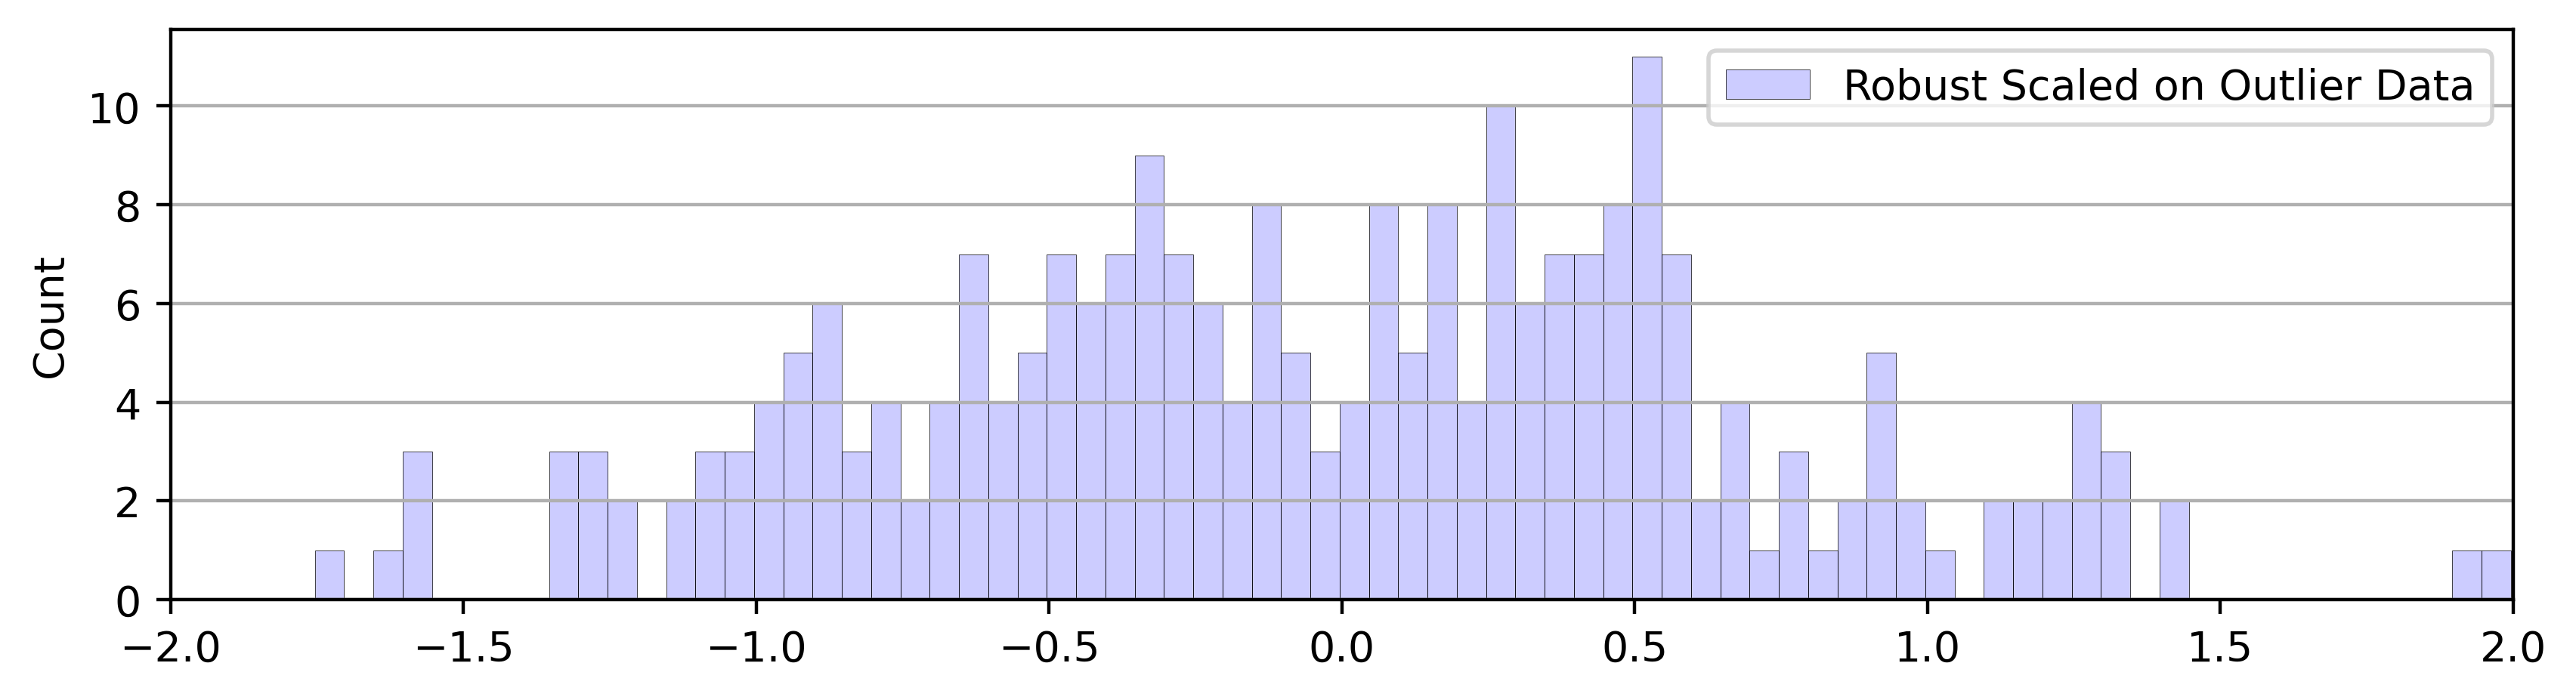

In [ ]:
plt.figure(figsize=(10, 2.5), dpi=400)
axes = plt.gca()
axes.yaxis.grid()

arr = np.random.normal(loc=5, scale=1, size=(250,))
adjusted = (arr - arr.min()) / (arr.max() - arr.min())

sns.histplot(adjusted, color='green', label='Normalized on No-outlier Data', alpha = 0.2, binwidth=0.01)
plt.legend()
plt.show()

plt.figure(figsize=(10, 2.5), dpi=400)
axes = plt.gca()
axes.yaxis.grid()

arr = np.append(arr, [30]*5)
rs_adjusted = (arr - np.median(arr)) / (np.quantile(arr, 0.75) - np.quantile(arr, 0.25))

sns.histplot(rs_adjusted, color='blue', label='Robust Scaled on Outlier Data', alpha = 0.2, binwidth=0.05)
plt.legend()
plt.xlim([-2, 2])
plt.show()

#### Standardization

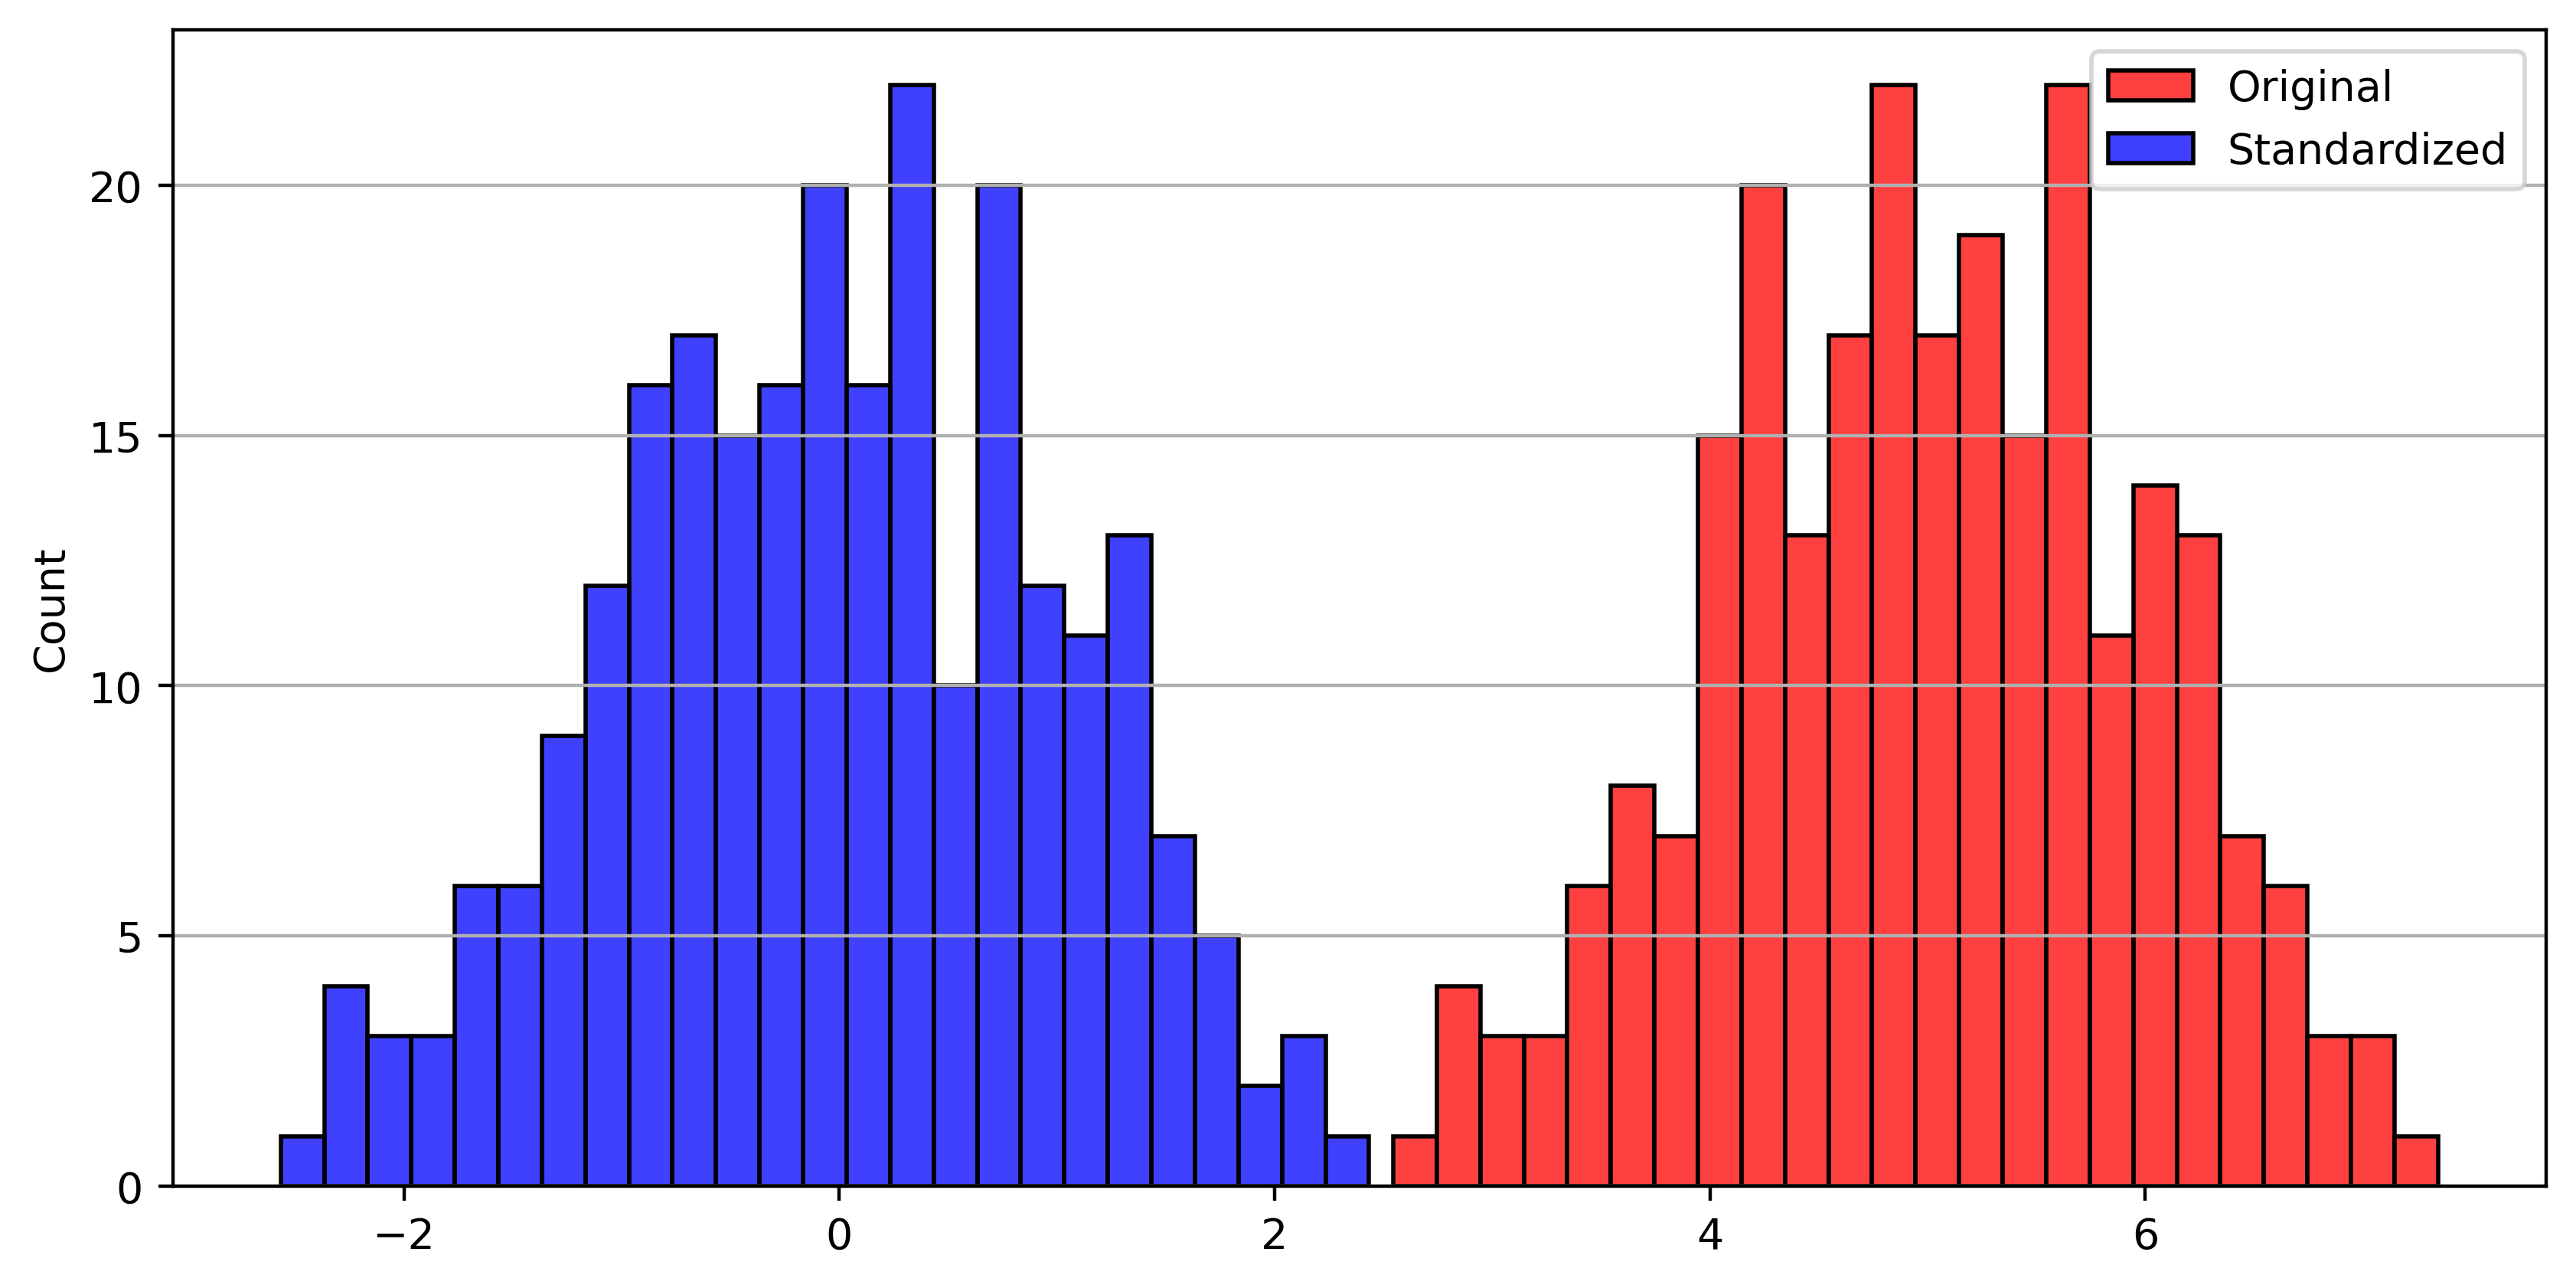

In [ ]:
arr = np.random.normal(loc=5, scale=1, size=(250,))
adjusted = (arr - np.mean(arr)) / np.std(arr)

plt.figure(figsize=(10, 5), dpi=400)
axes = plt.gca()
axes.yaxis.grid()
sns.histplot(arr, color='red', label='Original', binwidth=0.2)
sns.histplot(adjusted, color='blue', label='Standardized', binwidth=0.2)
plt.legend()
plt.show()

### Text Data

We will be using the UCI SMS Spam dataset.

In [ ]:
data = pd.read_csv('../input/sms-spam-collection-dataset/spam.csv', encoding = 'ISO-8859-1')
data = data.rename(columns={'v1':'label', 'v2':'text'})
data['isSpam'] = data['label'].map({'ham':0, 'spam':1})
data = data[['isSpam', 'text']]

from sklearn.model_selection import train_test_split as tts
X_train, X_val, y_train, y_val = tts(data['text'], data['isSpam'],
                                     train_size = 0.8)

#### Keyword Search

In [ ]:
def predict(text):
    keywords = ['buy', 'free', 'win']
    for keyword in keywords:
        if keyword in text.lower():
            return 1
    return 0

from sklearn.metrics import f1_score
f1_score(y_val, X_val.apply(predict))

0.4765625

#### Raw Vectorization

In [ ]:
def raw_vectorize(text):
    return one_hot_encoding(text.split(' '))

texts = np.array(['the dog jumped over the second dog',
                  'a dog is a dog and nothing else',
                  'a dog is an animal'])

def raw_vectorize(text):
    return one_hot_encoding(text.split(' '))

raw_vectorized = np.array([raw_vectorize(text).tolist() for text in texts])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
from keras.preprocessing.text import Tokenizer
tk = Tokenizer(num_words=10)
tk.fit_on_texts(texts)
tk.texts_to_sequences(texts)

[[3, 1, 5, 6, 3, 7, 1], [2, 1, 4, 2, 1, 8, 9], [2, 1, 4]]

In [ ]:
complete_text = ' '.join(texts)
unique = np.unique(complete_text.split(' '))
mapping = {i:token for i, token in enumerate(unique)}
mapping

{0: 'a',
 1: 'an',
 2: 'and',
 3: 'animal',
 4: 'dog',
 5: 'else',
 6: 'is',
 7: 'jumped',
 8: 'nothing',
 9: 'over',
 10: 'second',
 11: 'the'}

#### Bag of Words

In [ ]:
np.sum(tk.texts_to_matrix(texts), axis=0)

array([0., 3., 2., 1., 2., 1., 1., 1., 1., 1.])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features = 3000)
X_train_vec = vectorizer.fit_transform(X_train).toarray()
X_val_vec = vectorizer.transform(X_val).toarray()

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train_vec, y_train)

pred = model.predict(X_val_vec)
f1_score(pred, y_val)

0.8931297709923663

In [ ]:
from keras.preprocessing.text import Tokenizer
tk = Tokenizer(num_words=3000)
tk.fit_on_texts(X_train)
X_train_vec = tk.texts_to_matrix(X_train, mode='freq')
X_val_vec = tk.texts_to_matrix(X_val, mode='freq')

#### N-Grams

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features = 3000, 
                             ngram_range = (4, 4))
X_train_vec = vectorizer.fit_transform(X_train).toarray()
X_val_vec = vectorizer.transform(X_val).toarray()

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train_vec, y_train)
pred = model.predict(X_val_vec)
f1_score(pred, y_val)

0.5499999999999999

#### TD-IDF

In [ ]:
from keras.preprocessing.text import Tokenizer
tk = Tokenizer(num_words=3000)
tk.fit_on_texts(X_train)
X_train_vec = tk.texts_to_matrix(X_train, mode='tfidf')
X_val_vec = tk.texts_to_matrix(X_val, mode='tfidf')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features = 3000, 
                             ngram_range = (1, 1))
X_train_vec = vectorizer.fit_transform(X_train).toarray()
X_val_vec = vectorizer.transform(X_val).toarray()

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train_vec, y_train)
pred = model.predict(X_val_vec)
f1_score(pred, y_val)

0.8931297709923663

#### Sentiment Analysis

In [ ]:
from textblob import TextBlob
text = TextBlob("Feature encoding is very good")
text.sentiment

Sentiment(polarity=0.9099999999999999, subjectivity=0.7800000000000001)

In [ ]:
text = TextBlob("Feature encoding is very good!")
text.sentiment

Sentiment(polarity=1.0, subjectivity=0.7800000000000001)

In [ ]:
text = TextBlob("Feature encoding is not very good")
text.sentiment

Sentiment(polarity=-0.26923076923076916, subjectivity=0.46153846153846156)

In [ ]:
text = TextBlob("Feature encoding is a technique.")
text.sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [ ]:
text = TextBlob("I feel guilty - it's such terrible fun!")
text.sentiment

Sentiment(polarity=-0.28125, subjectivity=0.675)

In [ ]:
get_polarity = lambda x: round(TextBlob(x).sentiment.polarity, 2)
get_subj = lambda x: round(TextBlob(x).sentiment.subjectivity, 2)

In [ ]:
!pip install vaderSentiment

     |████████████████████████████████| 125 kB 595 kB/s            


In [ ]:
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
sentence = "Feature encoding is very good" 
scores = analyzer.polarity_scores(sentence)
scores

{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.4927}

In [ ]:
!pip install flair

In [ ]:
# import flair
# from flair.models import TARSClassifier
# from flair.data import Sentence
# tars = TARSClassifier.load('tars-base')
# sentence = Sentence("Feature encoding is very good")
# classes = ['positive', 'negative']
# tars.predict_zero_shot(sentence, classes)
# print(sentence)

In [ ]:
# sentence = Sentence("I'm feeling good about this, but don't know for sure.")
# classes = ['optimistic but careful']
# tars.predict_zero_shot(sentence, classes)
# print(sentence)

In [ ]:
# sentence = Sentence("Elephants can be found all over the world.")
# classes = ['animals']
# tars.predict_zero_shot(sentence, classes)
# print(sentence)

In [ ]:
# sentence = Sentence("I'm feeling good about this, but we should exercise caution.")
# classes = ['optimistic but careful']
# tars.predict_zero_shot(sentence, classes)
# print(sentence)

In [ ]:
# sent = """Feature encoding is very good
# Feature encoding is very good!
# Feature encoding is not very good
# Feature encoding is a technique.
# I feel guilty - it's such terrible fun!"""

# classes = ['happy', 'sad', 'excited',
#            'anxious', 'neutral']
# # you can also define custom classes

# for thing in sent.split('\n'):
#     sentence = Sentence(thing)
#     tars.predict_zero_shot(sentence, classes)
#     print(sentence)

### Word2Vec

In [ ]:
!pip install clean-text

In [ ]:
from cleantext import clean
import gensim

In [ ]:
import urllib.request
wnp = ""
data = urllib.request.urlopen('https://www.gutenberg.org/files/2600/2600-0.txt')

counter = 0
for line in tqdm(data):
    if counter == 50_000:
        break
    wnp += clean(line, no_line_breaks=True)[1:] + " "
    counter += 1
    
class Sentences(object):
    def __init__(self, text):
        self.text = text
 
    def __iter__(self):
        for sentence in wnp.split('.'):
            yield clean(wnp.split('.')[0], no_punct = True).split(' ')
            
sentences = Sentences(wnp)
model = gensim.models.Word2Vec(vector_size = 50,
                               min_count = 50,
                               workers = 4)
model.build_vocab(sentences)
model.train(sentences, 
            total_examples=model.corpus_count,
            epochs=30)

0it [00:00, ?it/s]

(5813423, 28723200)

In [ ]:
model.wv['war']

array([-0.25696295,  3.5703487 , -1.7798343 ,  0.9945607 ,  4.3973017 ,
       -0.22629872, -1.9143364 ,  2.031107  ,  0.14741819, -2.4769611 ,
       -0.64933735, -1.5481595 ,  0.6939877 ,  5.2614274 , -0.11960845,
       -3.1566374 ,  4.655208  ,  1.1983484 , -2.017265  , -2.0604212 ,
       -0.760677  , -0.55569774, -1.0670184 , -2.2508569 ,  4.3579955 ,
        1.4750543 ,  3.267176  , -0.7014842 , -2.0806925 ,  5.117454  ,
        2.3939033 , -0.8701684 , -2.1189663 , -0.83534604, -3.7275264 ,
        2.1877604 ,  1.298752  , -0.9427906 ,  0.46978647, -1.1171545 ,
       -0.5284408 , -1.9709119 ,  1.0233097 ,  0.67335194, -4.262241  ,
       -0.10164092,  1.5783955 ,  1.2117549 , -0.55686724,  1.4402213 ],
      dtype=float32)

In [ ]:
model.wv['peace']

array([-1.9479796 ,  1.7001966 ,  2.852719  ,  1.5569113 , -2.608776  ,
       -3.7818413 , -0.4186431 , -0.32619056, -1.5053358 , -2.184368  ,
        1.6014141 , -1.6973863 , -0.6713873 ,  2.3487368 ,  0.9876131 ,
        0.44847503, -1.2625687 , -0.08485116, -1.9468433 , -3.4225585 ,
        3.4827902 ,  2.462738  ,  0.19783899, -4.5892105 ,  1.7054439 ,
        3.9968634 ,  1.3223428 , -0.08268118, -0.24083161,  4.426982  ,
        0.36075363, -0.76909536,  2.2624009 ,  0.4293709 , -3.308202  ,
        1.6609577 , -0.7879924 ,  2.267667  ,  3.3017564 , -1.2593559 ,
       -0.16800816,  2.340596  , -0.28163332, -0.682497  , -3.3172214 ,
       -0.30956733,  0.6171133 , -0.12607133,  3.1992614 ,  1.7397348 ],
      dtype=float32)

In [ ]:
model.wv.similarity('war', 'peace')

0.3511804

### Time Data

In [ ]:
data = pd.read_csv('../input/amazon-us-software-reviews/data.csv')
data['data/review_date'] = pd.to_datetime(data['data/review_date'].apply(lambda x:x[2:]))
dates = data['data/review_date']

In [ ]:
year = dates.apply(lambda x:x.year)
months = dates.apply(lambda x:x.month)
day = dates.apply(lambda x:x.day)
weekday = dates.apply(lambda x:x.weekday)

pd.concat([year, months, day, weekday], axis=1)

,data/review_date,data/review_date,data/review_date,data/review_date
0,2015,6,23,<built-in method weekday of Timestamp object a...
1,2014,1,1,<built-in method weekday of Timestamp object a...
2,2015,4,12,<built-in method weekday of Timestamp object a...
3,2013,4,24,<built-in method weekday of Timestamp object a...
4,2013,9,8,<built-in method weekday of Timestamp object a...
...,...,...,...,...
341926,2012,9,11,<built-in method weekday of Timestamp object a...
341927,2013,4,5,<built-in method weekday of Timestamp object a...
341928,2014,2,9,<built-in method weekday of Timestamp object a...
341929,2014,10,6,<built-in method weekday of Timestamp object a...


In [ ]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
allHolidays = cal.holidays(start=dates.min(), 
                           end=dates.max()).to_pydatetime()
isHoliday = dates.apply(lambda x:x in allHolidays)

---